In [1]:
import numpy as np
from PIL import Image
from glob import glob

In [12]:
# Names 
dirNames = ['Aiden','Andrew','Cathy']

## 사진들을 Numpy 배열을 이용하여 Training Data 만들기

In [13]:
number_of_data = 18 * len(dirNames)
img_width_size = 300
img_height_size = 400

In [14]:
train = np.zeros(number_of_data * img_width_size * img_height_size, dtype= np.int32).reshape(number_of_data,img_height_size,img_width_size)
i = 0

for name in dirNames:
    for file in sorted(glob("../Data/FaceGray/%s/*.jpg"%name)):
        img = np.array(Image.open(file),dtype = np.int32)
        train[i,:,:] = img
        i +=1


In [15]:
train.shape

(54, 400, 300)

In [16]:
train[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

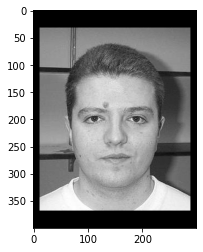

In [20]:
import matplotlib.pyplot as plt
plt.imshow(train[0].reshape(400,300), cmap = 'gray' )
plt.show()

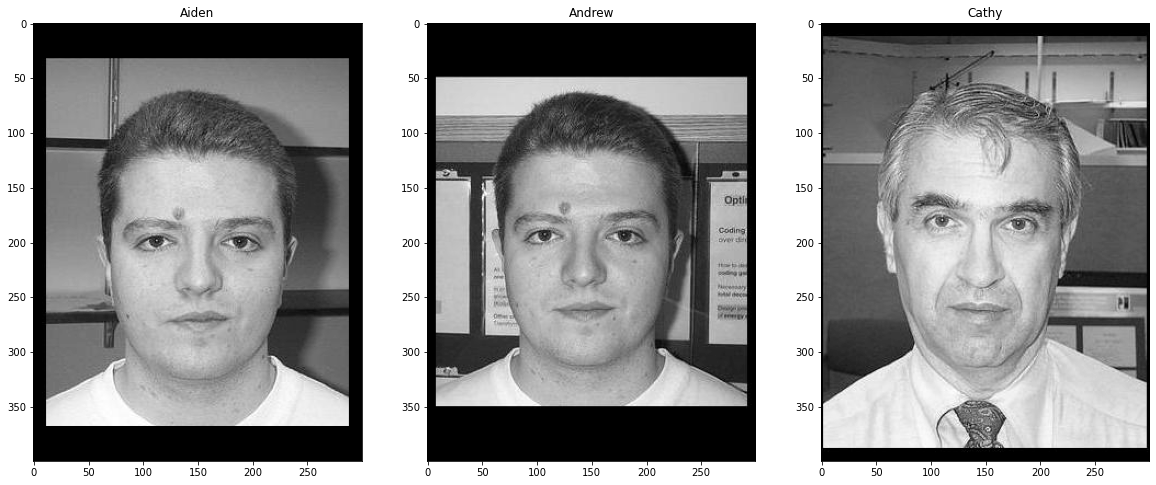

In [21]:
plt.figure(figsize = (20,20))
orderNo = list(range(0,len(dirNames) * 10, 10))

for i in list(range(1, len(dirNames)+1)):
    plt.subplot(1, len(dirNames), i )
    plt.imshow(train[orderNo[i-1]].reshape(400,300), cmap = 'gray')
    plt.title(dirNames[i-1])

### target Data 만들기

In [23]:
# Aiden = 0 , Andrew : 1 , Cathy : 2


target = np.concatenate([np.zeros(18), np.ones(18), np.full(18,2)])

In [24]:
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.])

---
# trin과 test로 분류하기

In [25]:
train = train.reshape(-1,400,300,1) / 255.0

In [26]:
from sklearn.model_selection import train_test_split

trainData, valData, trainTargetData, valTargetData = train_test_split(
    train, target, test_size=0.2, random_state=42
)

In [27]:
print(trainData.shape)
print(valData.shape)

print(trainTargetData.shape)
print(valTargetData.shape)

(43, 400, 300, 1)
(11, 400, 300, 1)
(43,)
(11,)


---
# CNN 만들기

In [58]:
from tensorflow import keras

model = keras.Sequential()

In [59]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation = 'relu', padding = 'same', input_shape = (400,300,1)))

In [60]:
model.add(keras.layers.MaxPool2D(2))

In [61]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPool2D(2))

In [62]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(len(dirNames),activation = 'softmax'))

In [63]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 400, 300, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 200, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 200, 150, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 100, 75, 64)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 480000)            0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [64]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/CNN/best-gray-cnn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5,restore_best_weights=True)

history = model.fit(
    trainData,trainTargetData,epochs = 20,
    validation_data=(valData,valTargetData),
    callbacks = [checkpoint_cb,early_stopping_cb]
)


Epoch 1/20
2/2 [==============================] - 3s 957ms/step - loss: 2.2257 - accuracy: 0.3953 - val_loss: 11.5370 - val_accuracy: 0.1818
Epoch 2/20
2/2 [==============================] - 3s 832ms/step - loss: 5.6879 - accuracy: 0.4186 - val_loss: 0.9776 - val_accuracy: 0.6364
Epoch 3/20
2/2 [==============================] - 2s 825ms/step - loss: 0.4134 - accuracy: 0.8605 - val_loss: 0.2489 - val_accuracy: 0.9091
Epoch 4/20
2/2 [==============================] - 3s 877ms/step - loss: 0.2631 - accuracy: 0.9070 - val_loss: 0.3514 - val_accuracy: 0.9091
Epoch 5/20
2/2 [==============================] - 2s 761ms/step - loss: 0.0685 - accuracy: 1.0000 - val_loss: 0.7396 - val_accuracy: 0.9091
Epoch 6/20
2/2 [==============================] - 2s 758ms/step - loss: 0.0437 - accuracy: 0.9767 - val_loss: 0.6185 - val_accuracy: 0.9091
Epoch 7/20
2/2 [==============================] - 2s 735ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.3890 - val_accuracy: 0.9091
Epoch 8/20
2/2 [===

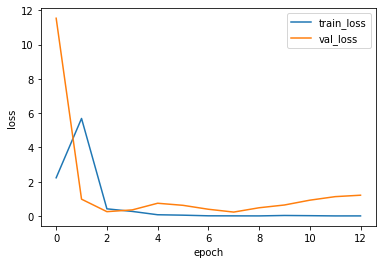

In [67]:
# 시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])
plt.show()

In [68]:
# 검증 데이터
model.evaluate(valData,valTargetData)

1/1 [==============================] - 0s 131ms/step - loss: 0.2241 - accuracy: 0.9091


[0.22410470247268677, 0.9090909361839294]

---
### 이미지로 확인해보기

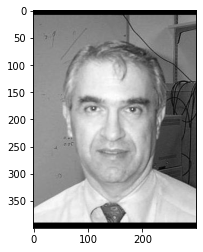

In [69]:
plt.imshow(valData[0].reshape(400,300), cmap = 'gray')
plt.show()

In [70]:
preds = model.predict(valData[0:1])
preds

1/1 [==============================] - 0s 413ms/step


array([[2.9825464e-06, 9.9999177e-01, 5.2449004e-06]], dtype=float32)

In [71]:
dirNames[np.argmax(preds[0])]

'Andrew'

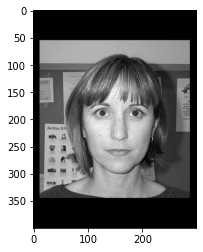

In [72]:
plt.imshow(valData[2].reshape(400,300), cmap = 'gray')
plt.show()

In [75]:
preds = model.predict(valData[2:3])
dirNames[np.argmax(preds[0])]


1/1 [==============================] - 0s 74ms/step


'Cathy'

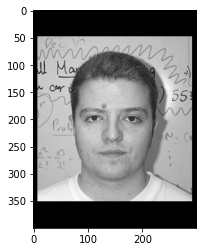

1/1 [==============================] - 0s 80ms/step


'Aiden'

In [76]:
plt.imshow(valData[3].reshape(400,300), cmap = 'gray')
plt.show()
preds = model.predict(valData[3:4])
dirNames[np.argmax(preds[0])]
